In [4]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

In [57]:
df1 = pd.read_csv('Assignment 1 - steps data.csv', sep=";") #delimiter=";"
df1.head(5)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0


In [59]:
df2 = pd.read_csv('Assignment 1 - survey data.csv')
df2.head(5)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0


In [6]:
df_original = pd.merge(df1, df2, on = 'id') #combine both dataframes
df_original.head()
#df['height'].value_counts() #get a column from the dataframe

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,hh_type,education,height,weight,waist
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0
1,2,NaN,NaN,NaN,NaN,NaN,641.0,4045.0,2310.0,2480.0,...,NaN,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0
3,4,NaN,NaN,25.0,4067.0,7192.0,154.0,8674.0,8275.0,850.0,...,NaN,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0


Then combining the steps of each user to get the average (mean) over a period of time. And adding the average steps of each user to the table.

In [7]:
df_original['average'] = df_original.mean(axis=1)
df_original['average'].dropna() 
df_original.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,hh_type,education,height,weight,waist,average
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,6299.506849
1,2,NaN,NaN,NaN,NaN,NaN,641.0,4045.0,2310.0,2480.0,...,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,3218.211111
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,4865.216749
3,4,NaN,NaN,25.0,4067.0,7192.0,154.0,8674.0,8275.0,850.0,...,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,6048.020979
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,5325.489510


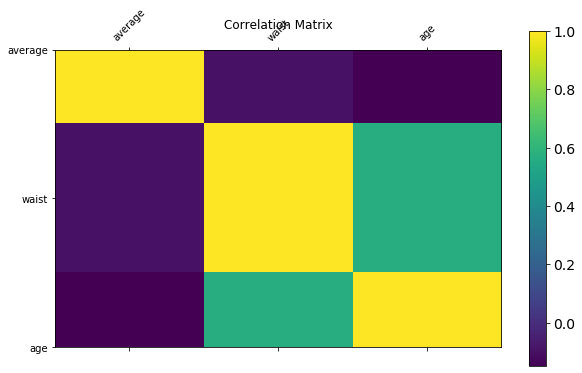

In [51]:
import matplotlib.pyplot as plt
df_x = df_original[['average','waist','age']]

f = plt.figure(figsize=(10, 6))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df_x.shape[1]), df_x.columns, fontsize=10, rotation=45)
plt.yticks(range(df_x.shape[1]), df_x.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=12);

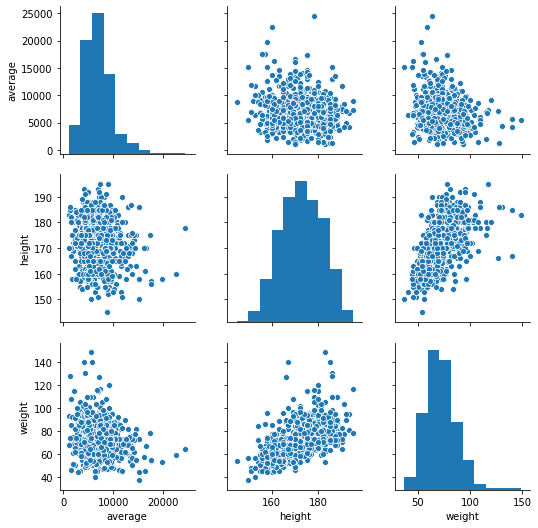

In [52]:
df_correlation = df_original[['average', 'height', 'weight']]
sns.pairplot(df_correlation)
plt.show()

Removing the values of the three metrics which are 'outlaws'. 

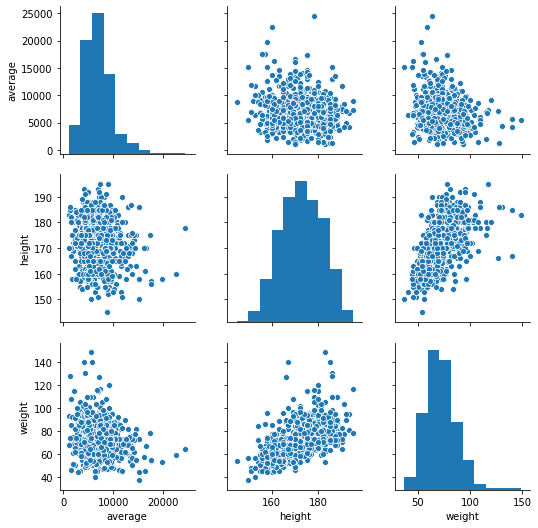

In [13]:
df_original = df_original[(df_original['average'] > 500)& (df_original['height'] > 100) & (df_original['weight'] > 40)] #remove wrong data
df = df_original[['average','height','weight']]
sns.pairplot(df.dropna())
plt.show()

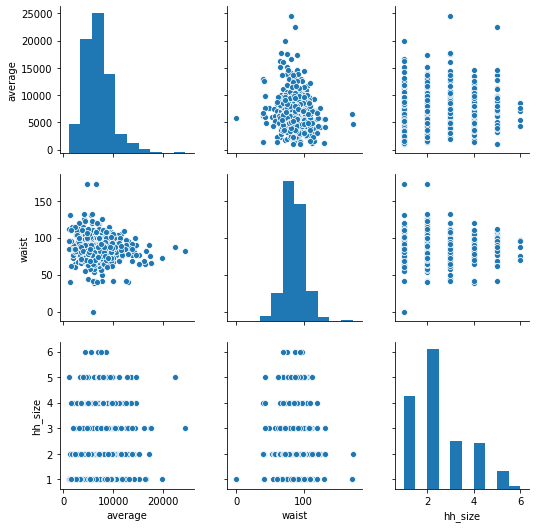

In [65]:
df_original2 = df_original[(df_original['average'] > 500)] #remove wrong data
df2 = df_original2[['average','waist','hh_size']]
sns.pairplot(df2.dropna())
plt.show()

Scatter plots of weight and average steps variables. The average steps are defined by 500 steps per day and more.

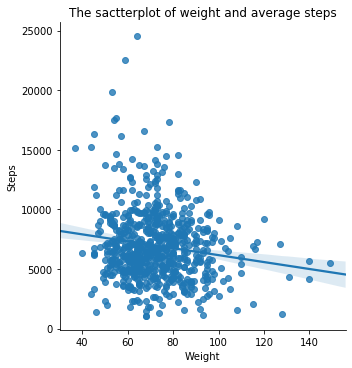

In [19]:
#df_subset = df[df["average"]>200]
#df_subset = df[df["weight"]>40]
steps = df["average"]
weight = df["weight"]
sns.lmplot(x="weight", y="average", fit_reg=True, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel("Weight") #use matplotlib to refine Seaborn plot
plt.ylabel("Steps")
plt.title("The sactterplot of weight and average steps")
plt.show()

Scatter plots of height and average steps variables. The average height are defined by 150 and up.

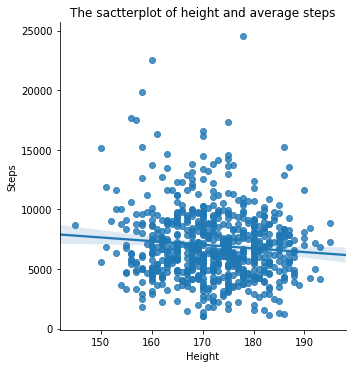

In [20]:
height = df["height"]
sns.lmplot(x="height", y="average", fit_reg=True, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel("Height") #use matplotlib to refine Seaborn plot
plt.ylabel("Steps")
plt.title("The sactterplot of height and average steps")
plt.show()

In [22]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(df['average'],df['weight']))
print(pearsonr(df['average'],df['height']))

(-0.14848678925833356, 7.661730074240963e-05)
(-0.09307019835947995, 0.013495936527380735)


Pearson’s correlation for the 2 relations: average and height & average and weight. 

There is a little correlation between the average steps and the weight (r = 0.14) and almost no correlation between the average steps and the height (r = 0.09). Which makes sense because if changes in weight can be due to height difference hence amount of steps will differ. As for height and steps, activity levels are quite individual, which makes sense as the height doesn't determine ones activity levels. For weight and steps the correlation is not significant because the P is 7,66, so it will be an extreamly high number. Yet, for the height and steps the correlation is moderatley significant because the P is 0,013, so it will be a relatively low number.

In [35]:
#create new dataframe with two more variables
df_relation = df_original[["education","average", "gender"]].dropna()
df_relation = df_relation[df_relation["average"]>500] # doenst seem to work, thats why the r wornt wont work
df_relation

,education,average,gender
0,master or doctorate,6299.506849,male
1,high school,3218.211111,female
2,master or doctorate,4865.216749,female
3,bachelor,6048.020979,male
4,master or doctorate,5325.489510,male
...,...,...,...
924,high school,9384.215054,male
925,bachelor,5042.600000,male
926,primary,8587.298387,female
927,master or doctorate,5312.715596,female


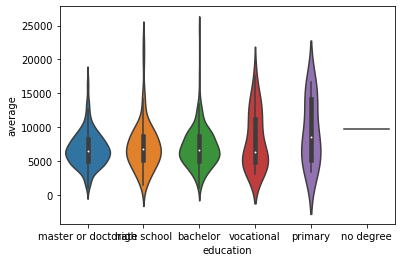

In [32]:
ax = sns.violinplot(x="education", y="average", data=df_relation)

EXAPLIN violin chart: The violin charts (above and below) seem to show that most of the users are either bachelores or master/doctorate students or graduates, where as the educations lower than that seem to have less users. Both bachelores or master/doctorate students or graduates seem to have a relatively similar activity levels. High school students have less users than the previous two groups but have relativlely similar activity paterns.

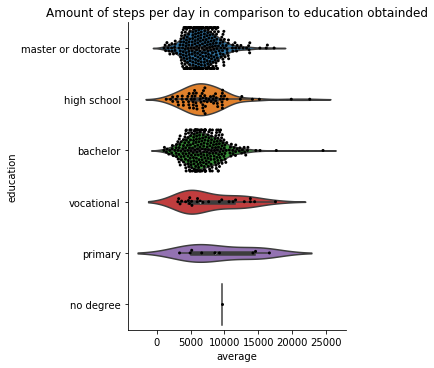

In [55]:
sns.catplot(x="average", y="education", kind="violin", data=df_original)
sns.swarmplot(x="average", y="education", size=3, color="k", data=df_original)
plt.title('Amount of steps per day in comparison to education obtainded')
plt.show()

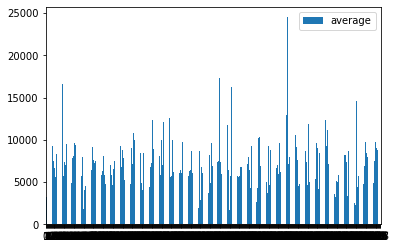

In [34]:
ax = df_relation.plot.bar(rot=1)

Above: The bar chart is quite unclear and does not tell much.

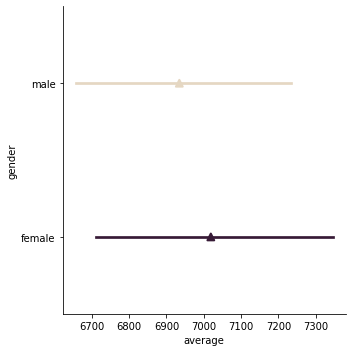

In [104]:
sns.catplot(x="average", y="gender", #this point plot did not work out...
            palette="ch:.25",
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=df_original);

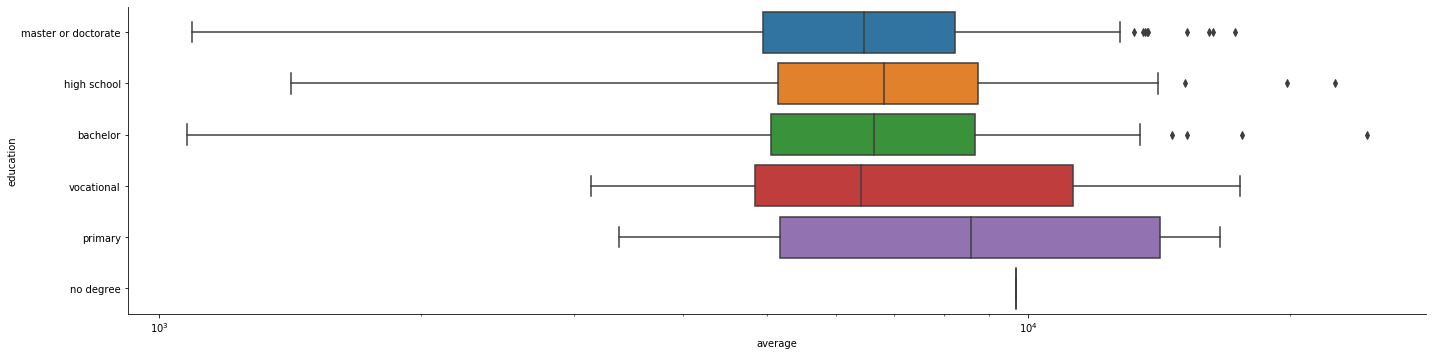

In [108]:
g = sns.catplot(x="average", y="education",
                kind="box", orient="h", height=5, aspect=4,
                data=df_original)
g.set(xscale="log");

Through this we can see that on average primary schoolstudents are on average more active than any other education student group. As well as, vocational school students are on average less active than any other group. There is only a couple of users with no degree, who individually seem to be to most active, however having so little users in that category doesn't provide a clear overview of the whole group.

In [67]:
pd.crosstab(df_original["average"],df_original["education"], normalize="columns")

education,bachelor,high school,master or doctorate,no degree,primary,vocational
average,,,,,,
1074.833333,0.003623,0.000000,0.000000,0.0,0.0,0.00
1090.846154,0.000000,0.000000,0.003135,0.0,0.0,0.00
1152.500000,0.003623,0.000000,0.000000,0.0,0.0,0.00
1259.062500,0.000000,0.000000,0.003135,0.0,0.0,0.00
1332.888889,0.000000,0.000000,0.003135,0.0,0.0,0.00
...,...,...,...,...,...,...
17505.943503,0.000000,0.000000,0.000000,0.0,0.0,0.04
17629.739130,0.003623,0.000000,0.000000,0.0,0.0,0.00
19835.448276,0.000000,0.013514,0.000000,0.0,0.0,0.00


Comparing weight, average steps, and height in a correlation matrix.

In [37]:
df_relation_two = df_original[["hh_type","education"]].dropna()
df_relation_two.head(5)

,hh_type,education
0,couple,master or doctorate
1,couple,high school
2,couple,master or doctorate
3,single parent,bachelor
4,couple,master or doctorate


I don't know how to combine two qualitative variables in a visualization. assignment:'Graphs of the relation (e.g., bar plot)'

In [40]:
pd.crosstab(df_relation_two["hh_type"], df_relation_two["education"])

education,bachelor,high school,master or doctorate,no degree,primary,vocational
hh_type,,,,,,
couple,106,23,123,0,3,4
family,76,22,90,0,5,11
other,17,5,17,0,0,0
single,67,19,81,1,1,7
single parent,10,5,8,0,0,3


In [66]:
pd.crosstab(df_original["gender"],df_original["education"], normalize="columns")

education,bachelor,high school,master or doctorate,no degree,primary,vocational
gender,,,,,,
female,0.445652,0.648649,0.432602,0.0,0.444444,0.52
male,0.554348,0.351351,0.567398,1.0,0.555556,0.48


So far the biggest difference seems to be that more females are going or graduated from high school, and also slightly more males have a master or doctorate degree, where as oposite appiles for females and a bachelors degree.

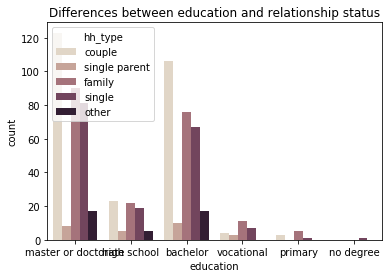

In [123]:
sns.countplot(x="education", hue="hh_type", palette="ch:.25", data=df_original)      #plot shows the education and relationship diffences of the paricipants    
plt.title('Differences between education and relationship status')
plt.show()